In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp

In [2]:
def plotagraficos (opiniao,modelo):
  f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,5))
  ax1.set_title(label=modelo)
  ax1.scatter(DadosTreino['x'],DadosTreino['y'],c=opiniao,cmap="rainbow")
  ax2.set_title("Original")
  ax2.scatter(DadosTreino['x'],DadosTreino['y'],c=dados['label'],cmap="rainbow")


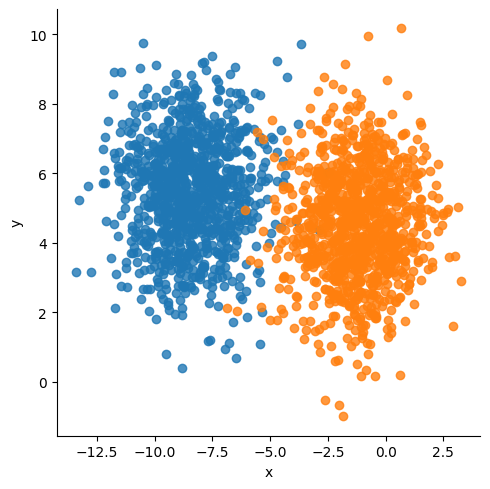

              x         y  label
0     -8.806930  7.248033      0
1    -10.450622  5.293447      0
2     -0.833457  3.721687      1
3     -7.800044  5.891239      0
4     -6.628308  7.540552      0
...         ...       ...    ...
1995  -2.915128  5.236034      1
1996  -0.136114  3.775187      1
1997  -7.934534  7.192954      0
1998  -5.343402  1.998966      0
1999  -2.722987  5.052266      1

[2000 rows x 3 columns]
0       -8.806930
1      -10.450622
2       -0.833457
3       -7.800044
4       -6.628308
          ...    
1995    -2.915128
1996    -0.136114
1997    -7.934534
1998    -5.343402
1999    -2.722987
Name: x, Length: 2000, dtype: float64


In [3]:
dados = pd.read_csv("Base5.csv")
df_dados = pd.DataFrame(dados)
sns.lmplot( x="x", y="y", data=df_dados, fit_reg=False, hue='label', legend=False)
plt.show()
print(df_dados)
print(df_dados['x'])

Modelo de regressão linear múltipla

c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


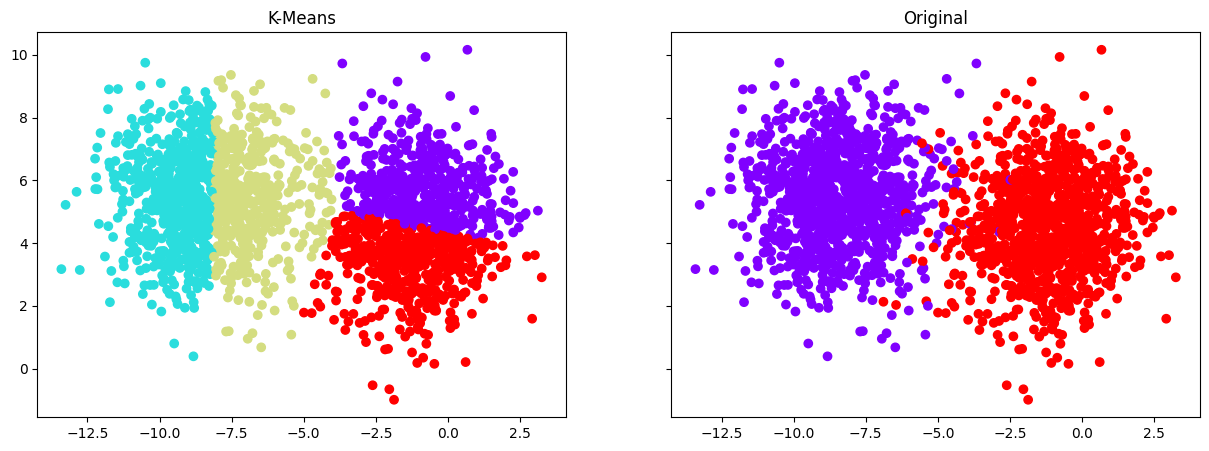

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(n_clusters=4, max_iter=100,random_state=15)
DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
kmeans.fit(DadosTreino)
X = kmeans.labels_
plotagraficos(X,'K-Means')


Avaliando os clusters gerados

In [5]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)

print("\nCoesão: ",math.sqrt(kmeans.inertia_)/kmeans.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,kmeans.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],kmeans.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],kmeans.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],kmeans.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], kmeans.labels_))




Soma dos quadrados das distâncias até o centróide mais próximo:  6499.633902765734

Coesão:  20.155076753087755

Coeficiente de Silhueta:  0.3136170995342121

Rand Score K-means:  0.7363826913456728

Homogeneidade :  0.8877480005490095

Completude :  0.446000382203431

Matriz de contingência kmeans
 [[  3 593 402   2]
 [465   0  36 499]]


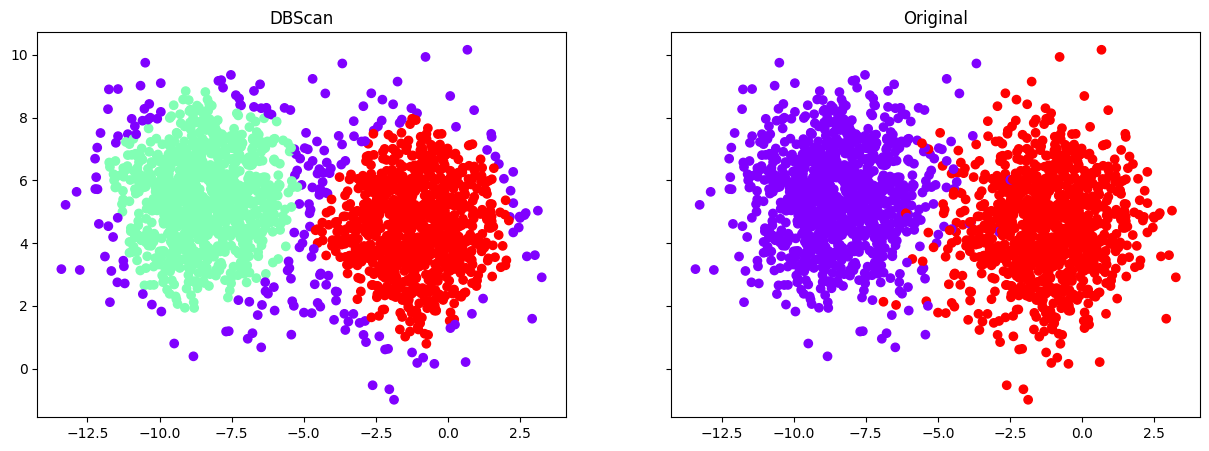

In [6]:
from sklearn.cluster import DBSCAN

DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
db = DBSCAN(eps=0.7, min_samples=25)
db.fit(DadosTreino)
X = db.labels_
plotagraficos(X,'DBScan')

In [7]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",db.inertia_)

print("\nCoesão: ",math.sqrt(db.inertia_)/db.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,db.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],db.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],db.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],db.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], db.labels_))

AttributeError: 'DBSCAN' object has no attribute 'inertia_'

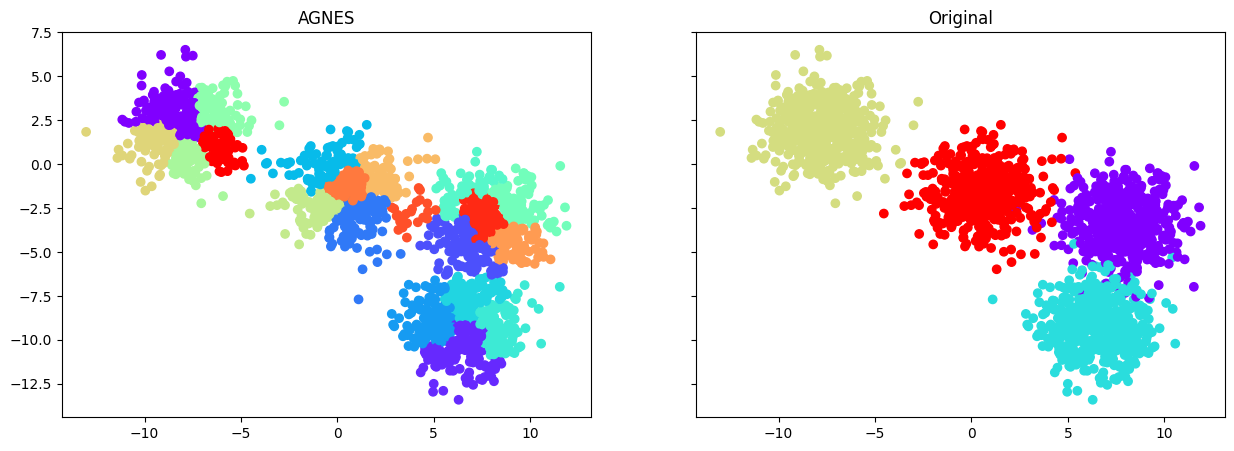

In [ ]:
from sklearn.cluster import AgglomerativeClustering

DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
Agnes = AgglomerativeClustering(n_clusters=20,linkage='ward')
Agnes.fit(DadosTreino)
X = Agnes.labels_
plotagraficos(X,'AGNES')

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

#print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",Agnes.inertia_)

#print("\nCoesão: ",math.sqrt(Agnes.inertia_)/Agnes.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,Agnes.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],Agnes.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],Agnes.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],Agnes.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], Agnes.labels_))


Coeficiente de Silhueta:  0.2968642151165107

Rand Score K-means:  0.8012516258129064

Homogeneidade :  0.9500059677054605

Completude :  0.4472471947261143

Matriz de contingência kmeans
 [[  0   0 111   1   0   0   7   3  56  90   0   0   0   0   1  95   0   8
  128   0]
 [  0 144  12   1 138   0 106  98   0   0   0   0   0   0   0   1   0   0
    0   0]
 [163   0   0   0   0   4   0   0   0   0  93  80   0  89   0   0   0   0
    0  71]
 [  0   0   0 111   0  86   0   0   1   0   0   0  85   0  87   0 113  17
    0   0]]
